In [66]:
%load_ext autoreload
%autoreload 2
%load_ext jupyternotify
import numpy as np 
from sets import Set
from conf_ope_rl import * 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>

In [3]:

# TODO: 
# Modify to do multiple red cells 

# indexing is j,i; j increasing goes downwards 
# (0,0), (0,1), (0,2)
# (1,0), (1,1), (1,2)... 
# (2,0), (2,1), (2,2) 

# The bad states are
# (0,0), (0,1) X, (0,2) X
# (1,0), (1,1),  (1,2) X... 
# (2,0) X, (2,1), (2,2) 



P_u0, R_u0 = grid_world_example()
[nA, nS,nS] = P_u0.shape
nU = 2
# make reward array
bad_Rwd = -0.3
living_Rwd = -0.1
R_u0_vec = np.asarray([living_Rwd, bad_Rwd, bad_Rwd, 
      living_Rwd  , living_Rwd, bad_Rwd, 
       bad_Rwd, bad_Rwd, 1])
R_u0 = np.zeros([nS,nA]); 
for a in range(nA): 
    R_u0[:,a] = R_u0_vec

# repeat for all actions

P_u1, R_u1 = westward_wind_grid_world_example()

P_u1
print R_u1.shape

(2, 2)
(2, 2)
(9, 4)


In [4]:
#'up':2, 'down':3, 'left':0, 'right':1

In [5]:
# build S,U transition matrix 
nU = 2
nS = 3*3
P_su = np.zeros([nS*nU, nA ,nS*nU])
P_su_mdptoolbox = np.zeros([nA , nS*nU, nS*nU])
Ps = [P_u0, P_u1]
for a_ind in range(nA): 
    for i_s in range(nS): 
        for i_sprime in range(nS): 
            for i_u in range(nU): 
                P_su[ i_s*nU + i_u,a_ind, i_sprime*nU:(i_sprime*nU+nU)] = Ps[i_u][a_ind, i_s, i_sprime]/nU
                P_su_mdptoolbox[ a_ind, i_s*nU + i_u, i_sprime*nU:(i_sprime*nU+nU)] = Ps[i_u][a_ind, i_s, i_sprime]/nU

# print [(P_su[:,a,:].sum(axis=1)) for a in range(nA)]
# print [(P_su_mdptoolbox[a,:,:].sum(axis=1)) for a in range(nA)]

In [6]:

import mdptoolbox.example
# P, R = mdptoolbox.example.forest()
vi = mdptoolbox.mdp.ValueIteration(P_u0, R_u0, 0.99)
vi.run()
pi_opt_s = vi.policy # result is (0, 0, 0)
pi_opt_s
pi_opt_s_ = np.zeros([nA, nS*nU])
for s in range(nS): 
    pi_opt_s_[pi_opt_s[s],s*nU] = 1
    pi_opt_s_[pi_opt_s[s],s*nU+1 ] = 1
print pi_opt_s
uniform_pi = np.ones([nA, nS*nU])*1.0 / (nA)
print uniform_pi
print pi_opt_s_

print np.round(pi_opt_s_,2)

(1, 1, 1, 3, 1, 1, 3, 3, 0)
[[0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
  0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
  0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
  0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
  0.25 0.25 0.25 0.25]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0.]]


In [7]:
R_u0

array([[-0.1, -0.1, -0.1, -0.1],
       [-0.3, -0.3, -0.3, -0.3],
       [-0.3, -0.3, -0.3, -0.3],
       [-0.1, -0.1, -0.1, -0.1],
       [-0.1, -0.1, -0.1, -0.1],
       [-0.3, -0.3, -0.3, -0.3],
       [-0.3, -0.3, -0.3, -0.3],
       [-0.3, -0.3, -0.3, -0.3],
       [ 1. ,  1. ,  1. ,  1. ]])

In [8]:
vi = mdptoolbox.mdp.ValueIteration(P_u0*0.5+0.5*P_u1, R_u0, 0.99)
vi.run()
pi_opt_smarg = vi.policy # result is (0, 0, 0)
pi_opt_smarg_ = np.zeros([nA, nS*nU])
for s in range(nS): 
    pi_opt_smarg_[pi_opt_smarg[s],s*nU] = 1
    pi_opt_smarg_[pi_opt_smarg[s],s*nU+1 ] = 1


In [9]:
R_su = np.repeat(R_u0, 2 ).reshape([nS*nU, nA])
vi = mdptoolbox.mdp.ValueIteration(P_su_mdptoolbox, R_su, 0.99)
vi.run()
pi_opt_su = vi.policy # result is (0, 0, 0)
pi_opt_su
pi_opt_su_ = np.zeros([nA, nS*nU])
for su in range(nS*nU): 
    pi_opt_su_[pi_opt_su[su],su] = 1
# print pi_opt_su
# print pi_opt_su_
# pi_opt_su_ = 0.8*pi_opt_su_ + 0.2*uniform_pi
# print np.round(pi_opt_su_,2)

## Rename 

In [59]:
# pi_opt_s_ optimal on state space s 
# pi_opt_su optimal on state space, unobserved state space U 

# Assume Suboptimal behavior policy 
mu_mix_behavior = 0.15
Pi = mu_mix_behavior*pi_opt_su_ + (1-mu_mix_behavior)*uniform_pi
nS = pi_opt_su_.shape[1] 
P = np.zeros([nS, nA, nS ])
# print p_e_su
P = P_su
state_dist = np.ones(nS)/nS
n = 40000
# get evaluation policy 

# Generate data

In [60]:
tight = False
# def get_full_agg_w_densratio( gamma, nS, nA, nU, P, Pi, p_e_su, state, n ): 
nSmarg = nS / nU
[ stateChangeHist, stateHist, a_s, s_a_sprime, p_infty_b_su, distr_hist ] =  simulate_rollouts( 
    nS, nA, P, Pi, state_dist, n )
p_infty_b_s = (reshape_byxrow(p_infty_b_su.T, nU).T).flatten()
p_infty_b_su = p_infty_b_su.flatten()


[0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556]


In [48]:
print 'stationary state occupancy s',  p_infty_b_s
print('stationary distn on s,u: ', p_infty_b_su)

print sum(p_infty_b_su)

stationary state occupancy s [0.18102047 0.12912177 0.15032124 0.06992325 0.13299668 0.1881703
 0.02274943 0.05132372 0.07437314]
('stationary distn on s,u: ', array([0.09059774, 0.09042274, 0.0641484 , 0.06497338, 0.07464813,
       0.07567311, 0.03437414, 0.03554911, 0.06857329, 0.06442339,
       0.09369766, 0.09447264, 0.01069973, 0.0120497 , 0.02589935,
       0.02542436, 0.03622409, 0.03814905]))
1.0


## Change evaluation policy 

In [12]:
# Closer to optimal evaluation policy
mumix = 0 # mixing coef for policies
p_e_su = pi_opt_su_*mumix + uniform_pi*(1-mumix)
p_e_s = reshape_byxrow(p_e_su.T,nU).T / nU 
print p_e_su


[[0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
  0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
  0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
  0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
  0.25 0.25 0.25 0.25]]


In [61]:
# process history 
print np.isclose(sum(p_infty_b_s),1)
[ p_a1_su, joint_s_a_sprime, s_a_giv_sprime ] = get_auxiliary_info_from_traj(stateChangeHist, 
                                        stateHist, a_s, s_a_sprime, p_infty_b_su, distr_hist, nA,nS)
# agg history and process
[aggStateHist, p_a1_s, p_e_s, agg_s_a_sprime, joint_s_a_sprime_agg, s_a_giv_sprime_agg] = agg_history(
            stateHist, s_a_sprime, p_infty_b_s, a_s, p_e_su, nA, nS, nSmarg, nU)
# # Simulate from evaluation policy: 
# [ stateChangeHist_e, stateHist_e, a_s_e, s_a_sprime_e, p_infty_e, distr_hist_e ] =  simulate_rollouts( 
#     nS, nA, P, p_e_su, state_dist, n )

print 'pi_e_s', p_e_s

True
pi_e_s [[0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.9625]
 [0.0125 0.9625 0.9625 0.9625 0.9625 0.9625 0.0125 0.0125 0.0125]
 [0.9625 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125]
 [0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.9625 0.9625 0.0125]]


In [62]:
import pickle
data = {'p_a1_su': p_a1_su, 'joint_s_a_sprime': joint_s_a_sprime, 's_a_giv_sprime':s_a_giv_sprime,'aggStateHist':aggStateHist,'p_a1_s':p_a1_s,'p_e_s':p_e_s,'agg_s_a_sprime':agg_s_a_sprime,'joint_s_a_sprime_agg':joint_s_a_sprime_agg,'s_a_giv_sprime_agg':s_a_giv_sprime_agg   } 
pickle.dump(data, open('data-0.15behaviormixture.p','wb'))

In [287]:
[ stateChangeHist, stateHist, a_s, s_a_sprime, p_infty_b_su_long, distr_hist ] =  simulate_rollouts( 
    nS, nA, P, Pi, state_dist, 10000 )
[ stateChangeHist_e, stateHist_e, a_s, s_a_sprime_e, p_infty_e_long, distr_hist_e ] =  simulate_rollouts( 
    nS, nA, P, p_e_su, state_dist, 10000 )

print p_infty_b_su_long
print p_infty_e_long
w_su_oracle_norm = p_infty_b_su_long/p_infty_e_long
w_s_oracle_norm = reshape_byxrow(w_su_oracle_norm.T,nU).T.flatten()
w_s_oracle_normalized = w_s_oracle_norm / np.dot(w_s_oracle_norm, p_infty_b_s)



[0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556]
[0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556]
[[0.0539946  0.05729427 0.06279372 0.05849415 0.14138586 0.14368563
  0.01929807 0.01989801 0.0449955  0.04109589 0.12728727 0.13148685
  0.00439956 0.00449955 0.01219878 0.01579842 0.03159684 0.02979702]]
[[0.04079592 0.04779522 0.06979302 0.07019298 0.19268073 0.1859814
  0.01389861 0.01429857 0.0369963  0.03439656 0.10868913 0.10748925
  0.00629937 0.00689931 0.01369863 0.01039896 0.01809819 0.02159784]]


In [23]:
pickle.dump({'min_bnds':min_bnds, 'max_bnds':max_bnds}, open('bnds-pi-smarg.p','w'))

In [73]:
PI_E = pi_opt_s_
# pi_opt_s_
# or pi_opt_smarg_

In [74]:
%%notify
tight = True; quiet = True; sense_min = False
ngams = 25
logGams_full = np.linspace(0.1, 1.7, ngams)

phi = R_u0_vec
nmus = 5
min_bnds = [[None] * ngams for m_ in range(nmus)];
max_bnds = [[None] * ngams for m_ in range(nmus)];
gamma = 1
mus = np.linspace(0.3,0.95,nmus)

print nA, nS
for m_ in range(nmus): 
#     p_e_su = pi_opt_smarg_*mus[m_] + uniform_pi*(1-mus[m_])
    p_e_su = PI_E*mus[m_] + uniform_pi*(1-mus[m_])
    p_e_s = reshape_byxrow(p_e_su.T,nU).T / nU 
    for ind,logGam in enumerate(logGams_full): 
        sense_min = False
        [a_bnd, b_bnd] = get_bnds_as( p_a1_s, logGam )
        [objVal, w_, m] = primal_opt_outer_L1_test_function_joint_distn(gamma, phi, a_bnd,b_bnd, joint_s_a_sprime_agg, p_infty_b_s, p_e_s, nSmarg, nA, tight, sense_min, quiet)
        print objVal
        print w_
        min_bnds[m_][ind] = objVal#; w_min_bnds[ind] = w_; 
        sense_min = True
        [objVal, w_, m] = primal_opt_outer_L1_test_function_joint_distn(gamma, phi, a_bnd,b_bnd, joint_s_a_sprime_agg, p_infty_b_s, p_e_s, nSmarg, nA, tight, sense_min, quiet)
        print objVal
        max_bnds[m_][ind] = objVal#; w_max_bnds[ind] = w_; 
        print w_  



4 18
9
None
None
9
None
None
9
None
None
9
None
None
9
None
None
9
None
None
9
-0.135310815772
[1.1799876231596682, 0.8621269211946369, 0.661523996072878, 1.436922603059115, 1.2950366255392824, 1.044829961839032, 1.1567809374449791, 1.6760949834957162, 1.6679373612221462]
9
-0.154791518707
[1.1569150128169623, 0.9361911568604501, 0.7766557530797606, 1.3272237167038168, 1.1683756149738391, 1.0269635772793615, 0.963054164994137, 1.316586194457878, 1.4130588805036877]
9
-0.131866157167
[1.182575244040904, 0.8447002720122433, 0.6442807061374406, 1.4503800593880423, 1.3102955227944613, 1.051250936985539, 1.1892820107695494, 1.7309529888353972, 1.7161964904847709]
9
-0.157660788568
[1.161905924780559, 0.9474200838317375, 0.7907360465194343, 1.320146525156142, 1.1542949217311045, 1.021082650380209, 0.9370832751054036, 1.2674127069707797, 1.370086654610982]
9
-0.128244926753
[1.1857585739244842, 0.8272876731169668, 0.6269776601007094, 1.4661619757160664, 1.3266903896314624, 1.0555350719136416,

-0.05550898385
[1.6556031672335847, 0.6375921050413572, 0.3570240808788291, 2.3158400649346147, 1.839444195191867, 0.5628910093931985, 2.298257741852919, 3.2359342046068194, 2.51249077041532]
9
-0.207781959441
[0.5766762301786257, 0.8651935755828416, 1.0660179496409623, 0.5981471828266461, 0.7252437453375398, 1.4951621238430601, 0.29891204576949715, 0.4707081950798053, 0.9897629404053537]
9
None
None
9
None
None
9
None
None
9
None
None
9
None
None
9
None
None
9
-0.105314677234
[1.2577519314565988, 0.7934032240691478, 0.5217719189716992, 1.6692211582016816, 1.4315127947291153, 1.020238962495493, 1.1774355185267156, 2.065030399298396, 2.0529798066966394]
9
-0.135155572435
[1.2439549252013693, 0.9048104078093955, 0.6688822496815197, 1.5315330082270913, 1.257889503997438, 1.0107988672450594, 0.9466916658288125, 1.513677074830478, 1.645426988289704]
9
-0.100125351039
[1.260384979391005, 0.7710472349329246, 0.5015122152349186, 1.6879210620382366, 1.450841025141321, 1.0215934874206758, 1.2196

-0.195888059296
[0.5408864231267686, 0.7278582528377433, 0.9429054518095552, 0.5890031801292739, 0.6901475501017219, 1.7508282330567406, 0.22341002317627753, 0.4269810696725011, 1.20333584962676]
9
0.017596775833
[1.3190944724711586, 0.43240848591181136, 0.19655485887381505, 2.733018860899934, 2.166382606121943, 0.44416329884050115, 2.66127072584552, 4.714466510829357, 3.665381150990839]
9
-0.199497053997
[0.5228118432897524, 0.7419728343601051, 0.970781596363603, 0.5560853178005477, 0.6312109080555485, 1.7530981259681933, 0.2059288577026747, 0.3861565817852817, 1.1723217322093016]
9
None
None
9
None
None
9
None
None
9
None
None
9
None
None
9
None
None
9
-0.0772229569623
[1.315816199116836, 0.7323920280120733, 0.41382781411442127, 1.872783264595357, 1.5488778757587678, 0.9791961352653126, 1.1302667439738836, 2.4271819538151216, 2.423544475449668]
9
-0.116891741347
[1.3204632014389, 0.876825858753202, 0.5774087335057277, 1.7296281749936615, 1.3439627698587755, 0.9835527623294984, 0.9049

-0.188761597802
[1.416775633120306, 1.0535441916373691, 0.8382077132780539, 1.1062965767746735, 0.7278230904379586, 1.1874846719420258, 0.3041943947589425, 0.47814992203612267, 0.9201451449694963]
9
0.0598077980456
[1.220659022257116, 0.35365083209772785, 0.13458516621486152, 2.7550626521579367, 2.1949853960544354, 0.39036541147768866, 2.377041112381207, 5.479199915570786, 4.364865303865152]
9
-0.190228821062
[1.4178418495285792, 1.0567882394444965, 0.8444627784002086, 1.078225955856496, 0.7115915947907745, 1.1939084387521517, 0.2906173488662289, 0.4572517650382205, 0.9040792437678029]
9
0.0672942797389
[1.216183622993542, 0.342244574186157, 0.12836179950191035, 2.6306402796134476, 2.2043423746534923, 0.3770634895388849, 2.3891859924405603, 5.636558969946146, 4.498262210293704]
9
-0.191641685628
[1.419120141287199, 1.0600280249450533, 0.8507051625410735, 1.0498312232799087, 0.6948027522041171, 1.2000617697072007, 0.2776250097865547, 0.4379807434916502, 0.8889909747532845]
9
None
None
9

9
0.0861030165665
[1.2808522128208473, 0.3302293123305362, 0.10685566061408372, 2.5387865182445037, 2.156816889787506, 0.36170890320657356, 1.8027948569762051, 5.841904065140287, 4.79808955595419]
9
-0.184800796414
[1.5403435385732034, 1.0766573560697985, 0.7844754130848963, 1.2046254591299286, 0.6894966552476054, 1.1522078873141117, 0.6329051143867419, 0.5256816855378422, 0.9361003081326009]
9
0.0937341298366
[1.2867287066326, 0.3227022893598524, 0.1026987371008963, 2.3827762374162202, 2.1528749429545155, 0.3494277213289114, 1.774534356816994, 5.998765664429229, 4.937314033715705]
9
-0.186399441674
[1.5431849227568124, 1.08138328964618, 0.7907217663100249, 1.1728442779828698, 0.6726045836834653, 1.1584333729505454, 0.6179855191073111, 0.5030657218070975, 0.917900597554368]
9
0.101969553914
[1.293493727987906, 0.31563865063579005, 0.09885231923823588, 2.191946802572572, 2.147734090052394, 0.3378724373726777, 1.7367968191888266, 6.172201961371827, 5.090326596345354]
9
-0.187913004529
[1

0.119391146138
[1.3063405130296737, 0.30488340644044226, 0.08565778162330724, 2.4140781869478127, 2.1032255159377278, 0.3358873368720507, 1.21355867532568, 5.983801891616817, 5.348976697902115]
9
-0.177973327345
[1.6720592995838395, 1.10384929637855, 0.7382481706442848, 1.3331480106264182, 0.6682592509355155, 1.1110956723669445, 0.6066284163289963, 0.5067003762801686, 0.9865407581322021]
9
0.127052949899
[1.3108572011312614, 0.2983315889599926, 0.08238671092377704, 2.258611789842898, 2.095000647606184, 0.3243386486864163, 1.1570633100441696, 6.148974246976123, 5.490287284275055]
9
-0.181121716049
[1.6562325356820589, 1.0967241983794713, 0.7369363494539332, 1.286168259811582, 0.649588228922291, 1.1526849265933385, 0.5841021184027546, 0.4796434725828264, 0.9528408005400234]
9
0.135234640155
[1.318307386131612, 0.292805912866547, 0.0795283403064365, 2.0681552241629553, 2.0839257649264984, 0.3135982023142832, 1.0861149448348366, 6.328130721801028, 5.6437469763382735]
9
-0.182847360254
[1.6

<IPython.core.display.Javascript object>

In [75]:
w_s_normalized_ = [None]* nmus
vals = [None] * nmus
# [ stateChangeHist, stateHist, a_s, s_a_sprime, p_infty_b_su_long, distr_hist ] =  simulate_rollouts( 
#     nS, nA, P, Pi, state_dist, 20000 )
# p_infty_b_s_long = reshape_byxrow(p_infty_b_su_long.T,nU).T.flatten()
for m_ in range(nmus): 
#     pi_opt_s = pi_opt_s_*mus[m_] + uniform_pi*(1-mus[m_])
#     p_e_su = PI_E*mus[m_] + uniform_pi*(1-mus[m_])
    p_e_su = pi_opt_smarg_*mus[m_] + uniform_pi*(1-mus[m_])
    [ stateChangeHist_e, stateHist_e, a_s, s_a_sprime_e, p_infty_e_long, distr_hist_e ] =  simulate_rollouts( 
        nS, nA, P, p_e_su, state_dist, 20000 )
#     print p_infty_b_su_long
#     print p_infty_e_long
    w_su_oracle_norm = p_infty_b_su/p_infty_e_long

#     w_su_oracle_norm = p_infty_b_su_long/p_infty_e_long
    w_s_oracle_norm = reshape_byxrow(w_su_oracle_norm.T,nU).T.flatten()
    w_s_oracle_normalized = w_s_oracle_norm / np.dot(w_s_oracle_norm, p_infty_b_s)
    w_s_normalized_[m_] = w_s_oracle_normalized
    # stationary evaluation occupancy
    vals[m_] = np.dot(np.ones(len(phi)), phi*reshape_byxrow(p_infty_e_long.T,nU).T.flatten())


print vals


[0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556]
[0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556]
[0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556]
[0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556]
[0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.

In [76]:
pickle.dump( {'vals':vals}, open('policy_s_opt_s__'+'-vals.p', 'w') )




In [68]:
scenario_title = 'mixture-pi-opt-s'


print np.sum(phi*p_infty_b_s)
print [np.round(np.dot(ws, phi*p_infty_b_s),2) for ws in w_s_normalized_]
vals = [np.round(np.dot(ws, phi*p_infty_b_s),2) for ws in w_s_normalized_]
pickle.dump( {'pib':p_a1_su, 'pie-mix-comp':p_e_su}, open(scenario_title+'-vals.p', 'w') )

-0.16340091497712556
[-0.16, -0.18, -0.2, -0.22, -0.27]


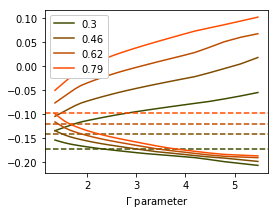

In [79]:
import pickle
plt.figure(figsize=(4.,3))
gams___ = np.exp(logGams_full)
scenario_title = 'mixture-pi-opt-s-ka-ctrl-var'
# scenario_title = 'mixture-pi-opt-s-ka-ctrl-var'
# vals_ = pickle.load( open('policy_smarg_-vals.p', 'r') )
# vals = vals_['vals']

for m_ in range(nmus-1): 
    plt.plot(np.exp(logGams_full),min_bnds[m_],color=((m_+1)*1.0/(nmus-1), 0.3,0),label=np.round(mus[m_],2)) #if m_%2 ==0 else None ) 
    plt.plot(np.exp(logGams_full),max_bnds[m_],color=((m_+1)*1.0/(nmus-1), 0.3,0))
#     plt.axhline(0,linestyle='--',color='gray')
# plt.tight_layout()
# plt.legend(framealpha=1)
#     upper = [ max_bnds[m_][gam_ind]>=vals[m_] for gam_ind in range(len(gams___)) ]
#     lower = [ min_bnds[m_][gam_ind]<=vals[m_] for gam_ind in range(len(gams___)) ]
    gam_in_bnds = np.where(np.logical_and(max_bnds[m_]>=vals[m_], min_bnds[m_]<=vals[m_]))[0]
#     plt.plot( gams___[gam_in_bnds],gams___[gam_in_bnds])
    plt.axhline(vals[m_], linestyle='--',color=((m_+1)*1.0/(nmus-1), 0.3,0 ))
plt.xlabel(r'$\Gamma$ parameter')
plt.legend(framealpha=1)
plt.savefig("3-3gridworld-"+scenario_title+".pdf",bbox_inches = 'tight')
# pickle.dump({'min_bnds':min_bnds, 'max_bnds':max_bnds}, open('bnds-'+scenario_title+'.p','w'))
# pickle.dump( {'pib':p_a1_su, 'pie-mix-comp':p_e_su}, open(scenario_title+'-params.p', 'w') )

mu mix behavior 0.3
mu mix evaluation 0
-0.12705983384248556


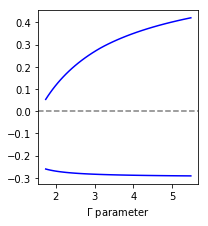

In [291]:
print 'mu mix behavior', mu_mix_behavior
print 'mu mix evaluation', mumix
plt.figure(figsize=(3,3))
plt.plot(np.exp(logGams_full),min_bnds,color='b')
plt.plot(np.exp(logGams_full),max_bnds,color='b')
plt.axhline(0,linestyle='--',color='gray')
plt.tight_layout()
# plt.axhline(np.dot(w_s_oracle_normalized, phi*p_infty_b_s))
plt.xlabel(r'$\Gamma$ parameter')
scenario_title = 'uninformative-uniform'+str(mu_mix_behavior)
plt.savefig("3-3gridworld-"+scenario_title+".pdf",bbox_inches = 'tight')

print np.dot(w_s_oracle_normalized, phi*p_infty_b_s)

In [120]:
np.dot(w_min_bnds[0], p_infty_b_s)

1.0

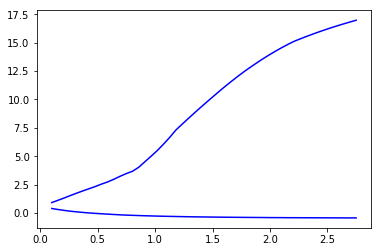

In [117]:
[min_,max_] = plot_bounds(w_min_bnds, w_max_bnds, phi, ngams, nSmarg, logGams_full, rearrange=False)

